Want a diversified real estate portfolio for growth to include large metropolitan areas such as NY CA TX or DC, as well as suburban NJ, CT, MA, and high growth perhaps CO or NV


Step 1. Take 2, 3 and 6 month moving averages for all zipcodes or counties for mean and standard deviation
Step 2. top 5-10 for counties sharpe ratio then go to zipcodes in that county iterate same process
Stpe 3. Counties with highest sharpe ratio for EWM Avg - rfr/EW STD in 2018 are then considered to invest intofor 5 mo periods
perhaps consider diversifying across sizes and not solely ROI but tbd

# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import statsmodels.api as sm
import pandas.tseries
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import itertools
from matplotlib.pylab import rcParams


df = pd.read_csv('zillow_data.csv')

In [2]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

In [3]:
def melt_data_state(df):
    melted = pd.melt(df, id_vars=['State'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate(['mean','std'])

In [4]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionID','RegionName', 'City', 'State', 'Metro', 'CountyName','SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':['mean','std']})

## Trying to figure out how to graph wide format

In [171]:
pd.options.display.max_rows = 10

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [6]:
dates = pd.to_datetime(df.columns[7:],format='%Y-%m')
dates

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

In [7]:
states = df.drop(columns=['RegionID','RegionName', 'City', 'Metro', 'CountyName','SizeRank'],axis=1).groupby('State').mean()
states = pd.DataFrame(states.reset_index())
state_columns = list(states.T.iloc[0])
states = states.T
states.columns = state_columns
states = states[1:]
states = states.set_index(pd.to_datetime(states.index))
states = states.applymap(lambda x: round(np.float(x),2))

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1996-04,128382,86795.6,68868,116203,200221,142562,157190,189217,125785,104529,...,54320,66087.5,109385,159646,122071,82825,140589,115151,66461.7,138712
1996-05,128832,87122.2,69015.5,116563,200125,142766,157064,188611,126235,104594,...,54640,66340.9,109407,159523,122137,82556.2,140839,115099,66575,138762
1996-06,129254,87460.8,69140.2,116935,200036,142985,156927,188011,126665,104662,...,54960,66595,109451,159407,122201,82306.2,141101,115032,66708.3,138742
1996-07,129639,87798.7,69262.9,117315,199966,143204,156778,187439,127027,104727,...,55290,66843.1,109522,159314,122267,82037.5,141379,114941,66848.3,138642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12,322657,151630,133189,265908,723263,396778,282176,790450,274488,280251,...,188426,146519,193761,307212,280220,216319,394340,195418,124022,227526
2018-01,323775,152403,133523,267328,729496,399905,282852,793622,277912,281561,...,189621,147266,194417,309130,280901,214750,398689,196398,124104,228565
2018-02,324168,153626,134456,268715,735526,403135,283827,798839,279471,283416,...,191111,148352,195503,311445,282144,213581,402130,197306,124335,229939
2018-03,323693,155504,136192,270489,742146,407292,284894,804600,276529,286091,...,193237,150242,197023,314686,284158,213250,405867,198282,124972,230997


In [9]:
states.iloc[-1,:].sort_values(ascending=False).head(10)

DC    806166.67
CA    746329.08
HI    683529.03
MA    458622.54
CO    410528.92
WA    408570.38
NJ    399037.85
NY    384160.69
MD    329705.36
NV    329420.39
Name: 2018-04-01 00:00:00, dtype: float64

In [10]:
top10states = list(states.iloc[-1,:].sort_values(ascending=False).head(10).index)

In [11]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}



In [57]:
states

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1996-04-01,128382.14,86795.57,68868.04,116202.79,200220.96,142561.94,157189.52,189216.67,125784.62,104529.02,...,54320.00,66087.47,109384.64,159645.69,122071.24,82825.00,140589.29,115151.38,66461.67,138712.50
1996-05-01,128832.14,87122.15,69015.46,116562.79,200124.83,142765.99,157063.71,188611.11,126234.62,104594.12,...,54640.00,66340.85,109406.89,159523.28,122136.83,82556.25,140838.99,115099.39,66575.00,138762.50
1996-06-01,129253.57,87460.76,69140.21,116934.88,200035.94,142985.43,156926.61,188011.11,126665.38,104662.35,...,54960.00,66594.99,109451.38,159406.90,122201.08,82306.25,141101.49,115032.11,66708.33,138741.67
1996-07-01,129639.29,87798.73,69262.89,117315.35,199965.57,143204.45,156778.23,187438.89,127026.92,104727.06,...,55290.00,66843.11,109521.50,159313.79,122267.20,82037.50,141378.57,114940.67,66848.33,138641.67
1996-08-01,130028.57,88156.96,69378.35,117719.53,199958.75,143461.94,156640.32,186900.00,127346.15,104816.99,...,55660.00,67081.70,109613.98,159254.31,122352.42,81781.25,141686.01,114840.98,67016.67,138533.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,322657.14,151629.51,133188.57,265908.26,723263.48,396777.51,282175.81,790450.00,274487.80,280250.96,...,188426.32,146519.31,193761.27,307212.40,280219.70,216318.75,394339.59,195418.07,124022.22,227525.81
2018-01-01,323775.00,152402.73,133522.86,267327.83,729496.41,399905.22,282852.42,793622.22,277912.20,281561.40,...,189621.05,147265.84,194417.49,309129.75,280901.00,214750.00,398688.56,196397.89,124104.17,228564.52
2018-02-01,324167.86,153625.68,134456.19,268714.78,735525.98,403134.94,283826.61,798838.89,279470.73,283416.18,...,191110.53,148351.98,195503.13,311445.45,282143.64,213581.25,402129.91,197306.02,124334.72,229938.71
2018-03-01,323692.86,155504.37,136192.38,270488.70,742146.32,407292.37,284893.55,804600.00,276529.27,286090.83,...,193236.84,150242.08,197023.36,314685.95,284158.35,213250.00,405867.16,198282.23,124972.22,230996.77


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


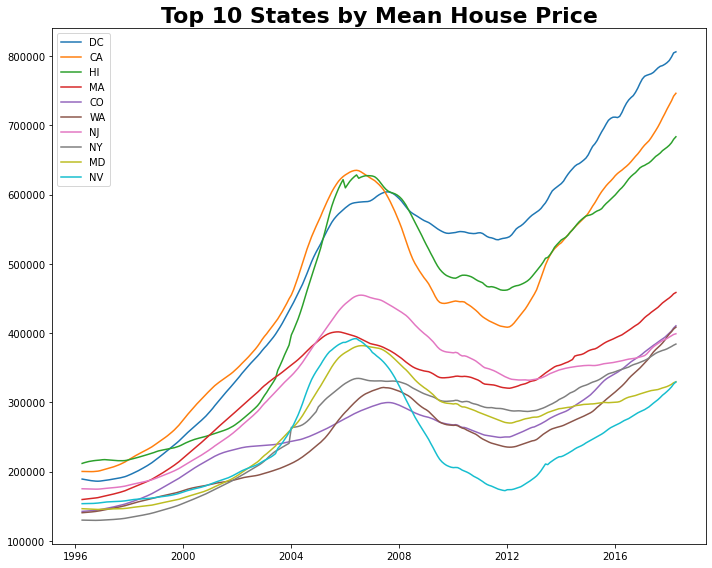

In [12]:

rcParams['figure.figsize'] = 10,8
sns.lineplot(data=states[top10states],dashes=False)
plt.title('Top 10 States by Mean House Price',font=font)
plt.tight_layout()

In [19]:
states_roi = states.resample('A').mean()
states_roi = states_roi.T

In [20]:
years = list(states_roi.columns.year)
years

[1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018]

In [21]:
states_roi.columns = states_roi.columns.year


In [22]:
states_roi.reset_index(inplace=True)


In [23]:
states_roi = states_roi.rename(columns={'index':'state'})


In [24]:
states_roi.columns[-11:,]

Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype='object')

In [25]:
years_5 = ['state',2013,2014, 2015, 2016, 2017, 2018]
years_10 = ['state',2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


In [26]:
states_roi['5_year_change'] = states_roi[2018] - states_roi[2013]
states_roi['10_year_change'] = states_roi[2018] - states_roi[2008]
states_roi['5_year_roi'] = states_roi['5_year_change'] / states_roi[2013]
states_roi['10_year_roi'] = states_roi['10_year_change'] / states_roi[2008]
states_roi['1_year_change'] = states_roi[2018] - states_roi[2017]
states_roi['1_year_roi'] = states_roi['1_year_change'] / states_roi[2017]


Text(0.5, 1.0, 'Top 10 States by 5 Year ROI on Average Home Prices')

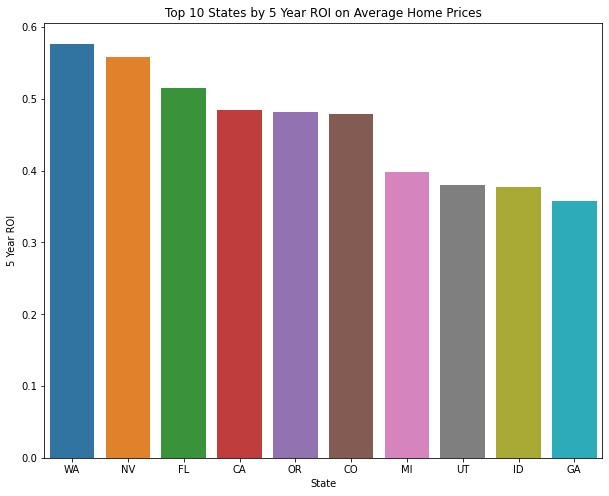

In [27]:
sns.barplot(x='state',y='5_year_roi',data=states_roi.sort_values(by='5_year_roi',ascending=False).head(10))
plt.xlabel('State')
plt.ylabel('5 Year ROI')
plt.title('Top 10 States by 5 Year ROI on Average Home Prices')

So NV and FL are new to the return party as they were not on 10 year highest returns. will need to investigate yearly trends and potentially even monthly to see when there is hopefully an inflection point or hopefully exponential change

Text(0.5, 1.0, 'Top 10 States by 10 Year ROI on Average Home Prices')

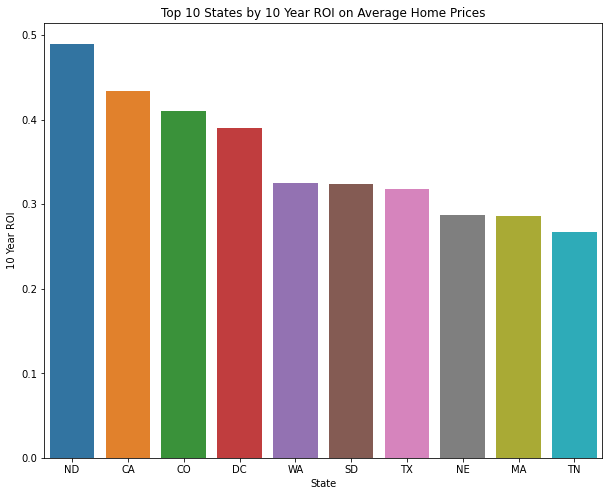

In [28]:
sns.barplot(x='state',y='10_year_roi',data=states_roi.sort_values(by='10_year_roi',ascending=False).head(10))
plt.xlabel('State')
plt.ylabel('10 Year ROI')
plt.title('Top 10 States by 10 Year ROI on Average Home Prices')

To note here some names that are in top 5 year ROI states are here as well but not in same order
i.e. ND is top here but not on other list, CA, CO, WA are only states on  both lists

Text(0.5, 1.0, 'Top 10 States by 1 Year ROI on Average Home Prices')

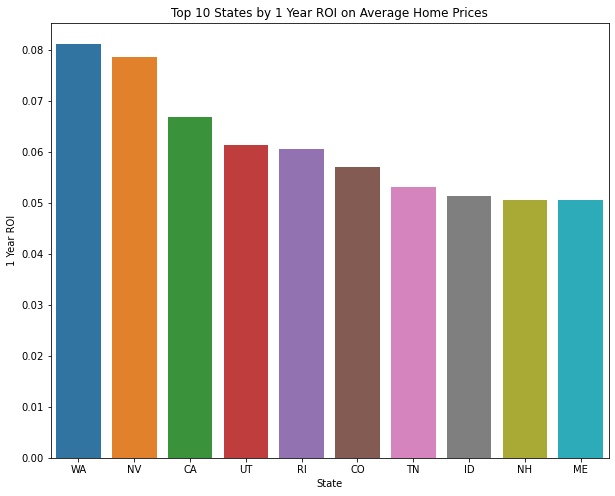

In [29]:
sns.barplot(x='state',y='1_year_roi',data=states_roi.sort_values(by='1_year_roi',ascending=False).head(10))
plt.xlabel('State')
plt.ylabel('1 Year ROI')
plt.title('Top 10 States by 1 Year ROI on Average Home Prices')

In [129]:
year_dt = pd.to_datetime(years,format='%Y')
year_dt = year_dt[1:]

DatetimeIndex(['1997-01-01', '1998-01-01', '1999-01-01', '2000-01-01',
               '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01',
               '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01',
               '2017-01-01', '2018-01-01'],
              dtype='datetime64[ns]', freq=None)

In [116]:
states = states.applymap(lambda x: round(np.float(x),2))

In [130]:
blank = pd.DataFrame(data=None,)
for x in years:
    blank['state'] = states_roi['state']
    if x +1 < 2019:
        blank[x+1] = (states_roi[x+1] - states_roi[x])/ states_roi[x]
    else:
        break

In [131]:
blank = blank.T

In [132]:
state_list = list(blank.iloc[0])
len(state_list)

51

In [843]:
blank.iloc[0]

AK    0.03
AL    0.05
AR    0.05
AZ    0.05
CA    0.04
      ... 
VT    0.00
WA    0.04
WI    0.01
WV    0.04
WY   -0.01
Name: 1997-01-01 00:00:00, Length: 51, dtype: float64

In [133]:
blank.columns = state_list

In [135]:
blank = blank[1:]

In [136]:
blank

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1997,0.034135,0.0514453,0.0455323,0.0477824,0.0387895,0.0416513,0.0109431,0.0134149,0.0216553,0.0273244,...,0.0653498,0.0492105,0.0151398,0.019079,0.023223,0.00303772,0.0412882,0.00570111,0.0423844,-0.0052059
1998,0.0600901,0.0442813,0.0438212,0.0545533,0.0948567,0.0831246,0.0478333,0.0771721,0.0442866,0.0467329,...,0.135481,0.0599438,0.0261128,0.024903,0.049049,0.0621025,0.0660946,0.0279329,0.0567002,-0.0199002
1999,0.0789336,0.0579714,0.0424463,0.058378,0.11538,0.122404,0.0770164,0.135115,0.0473559,0.0665621,...,0.256108,0.0548083,0.0326528,0.0141379,0.0666023,0.097106,0.0604083,0.053882,0.0283985,0.00470518
2000,0.0525022,0.0498486,0.0549447,0.065996,0.162788,0.133076,0.0959315,0.150064,0.0943076,0.0932007,...,0.176793,0.0392204,0.0379135,0.040792,0.0870249,0.10768,0.0603322,0.059938,0.0232677,0.0432871
2001,0.107453,0.0431498,0.0478737,0.0681749,0.125596,0.0986338,0.106268,0.157039,0.148634,0.120772,...,0.0799645,0.0330084,0.00592434,0.0306968,0.106959,0.0973155,0.0439876,0.0668255,0.0377769,0.0644406
2002,0.083073,0.041418,0.0241404,0.0595339,0.108173,0.0415811,0.10855,0.147593,0.130009,0.111421,...,0.0837585,0.0344643,0.00815054,-0.00290656,0.102342,0.0933407,0.0431321,0.0690384,0.0412195,0.0335178
2003,0.0498732,0.0453952,0.0645329,0.0647911,0.13954,0.0172506,0.111442,0.136659,0.125169,0.126713,...,0.0482285,0.0403471,0.0177142,-0.00504702,0.106878,0.109021,0.0545922,0.0550552,0.0571383,0.0448635
2004,0.0846075,0.0507739,0.0765757,0.120652,0.203979,0.0357083,0.108909,0.182425,0.190674,0.176991,...,0.0756428,0.058964,0.0496805,0.0185518,0.159337,0.108121,0.0978816,0.038522,0.105453,0.11269
2005,0.0899748,0.0820023,0.0904151,0.331637,0.18246,0.0683745,0.126872,0.163703,0.14608,0.281674,...,0.035869,0.0928151,0.0465014,0.05131,0.18809,0.154913,0.163705,0.0355955,0.184265,-0.0873341
2006,0.0829738,0.0898433,0.0674787,0.172201,0.0554682,0.0753847,0.0397099,0.0605201,0.0653282,0.144835,...,0.0323864,0.0858508,0.0394633,0.13243,0.0478144,0.08395,0.164536,0.0401501,0.0120776,0.143939


In [137]:
blank.index = year_dt

In [139]:
blank = blank.applymap(lambda x: round(np.float(x),2))

In [147]:
states.columns[]

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1996-04-01,128382.14,86795.57,68868.04,116202.79,200220.96,142561.94,157189.52,189216.67,125784.62,104529.02,...,54320.00,66087.47,109384.64,159645.69,122071.24,82825.00,140589.29,115151.38,66461.67,138712.50
1996-05-01,128832.14,87122.15,69015.46,116562.79,200124.83,142765.99,157063.71,188611.11,126234.62,104594.12,...,54640.00,66340.85,109406.89,159523.28,122136.83,82556.25,140838.99,115099.39,66575.00,138762.50
1996-06-01,129253.57,87460.76,69140.21,116934.88,200035.94,142985.43,156926.61,188011.11,126665.38,104662.35,...,54960.00,66594.99,109451.38,159406.90,122201.08,82306.25,141101.49,115032.11,66708.33,138741.67
1996-07-01,129639.29,87798.73,69262.89,117315.35,199965.57,143204.45,156778.23,187438.89,127026.92,104727.06,...,55290.00,66843.11,109521.50,159313.79,122267.20,82037.50,141378.57,114940.67,66848.33,138641.67
1996-08-01,130028.57,88156.96,69378.35,117719.53,199958.75,143461.94,156640.32,186900.00,127346.15,104816.99,...,55660.00,67081.70,109613.98,159254.31,122352.42,81781.25,141686.01,114840.98,67016.67,138533.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,322657.14,151629.51,133188.57,265908.26,723263.48,396777.51,282175.81,790450.00,274487.80,280250.96,...,188426.32,146519.31,193761.27,307212.40,280219.70,216318.75,394339.59,195418.07,124022.22,227525.81
2018-01-01,323775.00,152402.73,133522.86,267327.83,729496.41,399905.22,282852.42,793622.22,277912.20,281561.40,...,189621.05,147265.84,194417.49,309129.75,280901.00,214750.00,398688.56,196397.89,124104.17,228564.52
2018-02-01,324167.86,153625.68,134456.19,268714.78,735525.98,403134.94,283826.61,798838.89,279470.73,283416.18,...,191110.53,148351.98,195503.13,311445.45,282143.64,213581.25,402129.91,197306.02,124334.72,229938.71
2018-03-01,323692.86,155504.37,136192.38,270488.70,742146.32,407292.37,284893.55,804600.00,276529.27,286090.83,...,193236.84,150242.08,197023.36,314685.95,284158.35,213250.00,405867.16,198282.23,124972.22,230996.77


In [144]:
blank[top10states]

,DC,CA,HI,MA,CO,WA,NJ,NY,MD,NV
1997-01-01,0.01,0.04,0.01,0.04,0.04,0.04,0.01,0.01,0.00,0.02
1998-01-01,0.08,0.09,0.03,0.08,0.08,0.07,0.04,0.04,0.02,0.02
1999-01-01,0.14,0.12,0.05,0.12,0.12,0.06,0.07,0.07,0.05,0.03
2000-01-01,0.15,0.16,0.06,0.15,0.13,0.06,0.11,0.10,0.07,0.06
2001-01-01,0.16,0.13,0.05,0.15,0.10,0.04,0.12,0.11,0.09,0.07
2002-01-01,0.15,0.11,0.10,0.13,0.04,0.04,0.13,0.12,0.13,0.09
2003-01-01,0.14,0.14,0.20,0.11,0.02,0.05,0.14,0.14,0.16,0.13
2004-01-01,0.18,0.20,0.30,0.09,0.04,0.10,0.14,0.18,0.19,0.31
2005-01-01,0.16,0.18,0.28,0.08,0.07,0.16,0.15,0.14,0.22,0.23
2006-01-01,0.06,0.06,0.09,-0.01,0.08,0.16,0.08,0.07,0.09,0.04


<AxesSubplot:title={'center':'Top 10 States by Average Home Price YoY ROI'}, xlabel='Year', ylabel='YoY % Change'>

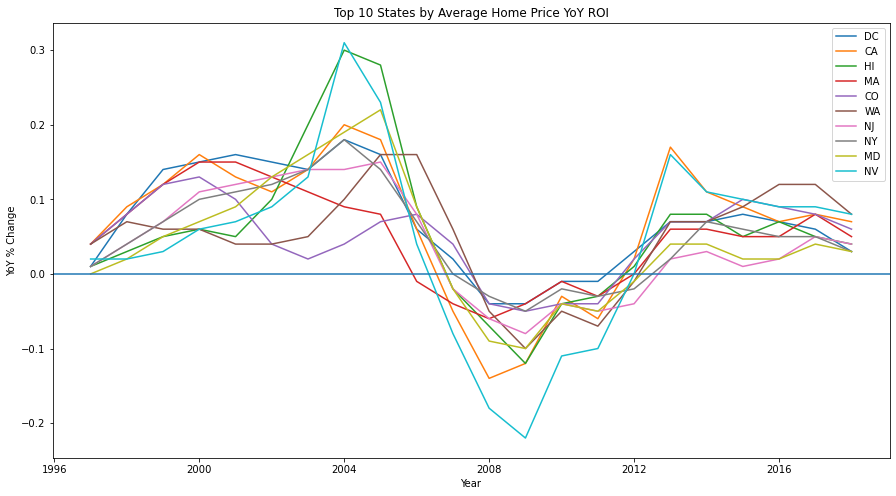

In [149]:
sns.lineplot(data=blank[top10states],dashes=False)
plt.axhline()
plt.title('Top 10 States by Average Home Price YoY ROI')
plt.xlabel('Year')
plt.ylabel('YoY % Change')
plt.gca()

In [160]:
melt_data_state(state.reset_index())

value               
                     mean            std
time                                    
1996-04-01  113287.551457   37728.528624
1996-05-01  113449.096145   37681.700272
1996-06-01  113605.485939   37626.366010
1996-07-01  113754.062055   37563.724239
1996-08-01  113908.480935   37500.188751
...                   ...            ...
2017-12-01  258941.836000  144460.500153
2018-01-01  260219.347933  145462.454319
2018-02-01  261654.078914  146562.763992
2018-03-01  263436.467558  147665.891124
2018-04-01  264644.311600  148211.429016

[265 rows x 2 columns]

## State Sharp Ratio 

In [231]:
rfr = pd.read_csv('DGS10.csv')

In [232]:
rfr.DATE = pd.to_datetime(rfr.DATE,infer_datetime_format=True)

In [233]:
rfr = rfr.set_index('DATE')
#rfr = rfr.resample('MS').mean()

In [248]:
rfr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5848 entries, 1996-01-02 to 2018-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DGS10   5848 non-null   object
dtypes: object(1)
memory usage: 251.4+ KB


In [249]:
rfr = rfr[rfr.DGS10 != '.']
rfr.DGS10 = rfr.DGS10.apply(lambda x: np.float(x))
rfr = rfr.resample('MS',).mean()
rfr = rfr[3:-1]
rfr.DGS10 = rfr.DGS10/100

In [487]:
rfr

,DGS10
DATE,
1996-04-01,0.065114
1996-05-01,0.067368
1996-06-01,0.069120
1996-07-01,0.068655
1996-08-01,0.066355
...,...
2017-12-01,0.024025
2018-01-01,0.025838
2018-02-01,0.028589


In [178]:
states.index = pd.to_datetime(states.index,format='%Y-%M')

In [179]:
states.index

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

In [354]:
CA = pd.DataFrame(data=states.CA)

In [355]:
months = CA.index

In [356]:
months

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

In [357]:
CA.loc[months]

,CA
1996-04-01,200220.96
1996-05-01,200124.83
1996-06-01,200035.94
1996-07-01,199965.57
1996-08-01,199958.75
...,...
2017-12-01,723263.48
2018-01-01,729496.41
2018-02-01,735525.98
2018-03-01,742146.32


In [358]:
span = [2,3,6]

In [336]:
(CA.iloc[1] - CA.iloc[0])/CA.iloc[0]

CA   -0.00048
dtype: float64

In [395]:
CA_ROI = pd.DataFrame(data= CA.copy())

In [396]:
CA_ROI

,CA
1996-04-01,200220.96
1996-05-01,200124.83
1996-06-01,200035.94
1996-07-01,199965.57
1996-08-01,199958.75
...,...
2017-12-01,723263.48
2018-01-01,729496.41
2018-02-01,735525.98
2018-03-01,742146.32


In [402]:

CA_ROI['ROI'] = np.zeros((265))

In [405]:
CA_ROI.iloc[2,1]

0.0

In [372]:
(CA.iloc[1] - CA.iloc[0])/CA.iloc[0]

CA   -0.00048
dtype: float64

In [424]:
CA_ROI.iloc[1,1] = (CA_ROI.iloc[1,0] - CA_ROI.iloc[0,0])/CA_ROI.iloc[0,0]

In [425]:
CA_ROI

,CA,ROI
1996-04-01,200220.96,0.00000
1996-05-01,200124.83,-0.00048
1996-06-01,200035.94,0.00000
1996-07-01,199965.57,0.00000
1996-08-01,199958.75,0.00000
...,...,...
2017-12-01,723263.48,0.00000
2018-01-01,729496.41,0.00000
2018-02-01,735525.98,0.00000
2018-03-01,742146.32,0.00000


## Creating table with averages for 1,5 and 10 years by state

In [816]:
st = []
average_5 = []
average_10 = []
avg_10_y = []
avg_5_y= []
avg_1_mo =[]
avg_1_y=[]
for state in state_dfs:
    st.append(state.columns[0])
    avg_1_mo.append(state['2017-04-01':].sharpe_ratio_monthly.mean())
    avg_1_y.append(state['2017-04-01':].sharpe_ratio_annual.mean())
    average_5.append(state['2013':'2018'].sharpe_ratio_monthly.mean())
    average_10.append(state['2008':'2018'].sharpe_ratio_monthly.mean())
    avg_5_y.append(state['2013':'2018'].sharpe_ratio_annual.mean())
    avg_10_y.append(state['2008':'2018'].sharpe_ratio_annual.mean())
state_averages = pd.concat([pd.DataFrame(st,dtype='str'),pd.DataFrame(avg_1_mo,dtype=float),pd.DataFrame(avg_1_y,dtype=float),
                            pd.DataFrame(average_5,dtype=float),pd.DataFrame(avg_5_y,dtype=float),
                                pd.DataFrame(average_10,dtype=float),pd.DataFrame(avg_10_y,dtype=float)],axis=1)
state_averages.columns = ['state','1yr_average_mo','1yr_average_y','5yr_average_mo','5yr_average_y','10yr_average_mo','10yr_average_y']


In [ ]:
state

In [773]:
state_dfs[9]['2008':].sharpe_ratio_annual.mean()

4.628819623863544

In [818]:
state_averages

,state,1yr_average_mo,1yr_average_y,5yr_average_mo,5yr_average_y,10yr_average_mo,10yr_average_y
0,AK,-0.080919,-2.536832,-0.093453,-1.025111,-1.994002,-4.500168
1,AL,1.281557,3.371267,0.514957,1.161495,-1.493403,-3.692643
2,AR,2.161374,5.626117,1.372406,2.689097,-0.934912,-2.706136
3,AZ,4.306864,17.315896,2.702335,8.624739,-0.901335,0.208162
4,CA,4.854121,8.547645,3.825827,6.881888,0.480114,0.693709
...,...,...,...,...,...,...,...
46,VT,0.347643,1.268638,-0.092440,-0.730700,-0.585533,-2.159940
47,WA,5.020184,36.716388,4.943066,14.390403,0.900723,4.250639
48,WI,9.269436,21.087308,3.228655,6.536762,-0.321145,-0.988571
49,WV,0.311478,-0.750812,0.166324,0.029879,-1.042769,-3.564703


<AxesSubplot:xlabel='state', ylabel='10yr_average_y'>

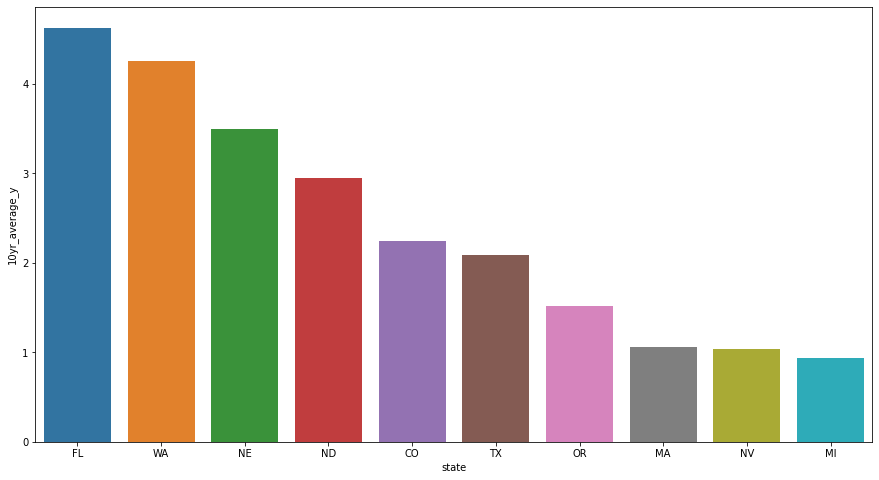

In [767]:
sns.barplot(x='state',y='10yr_average_y',data=state_averages.sort_values('10yr_average_y',ascending=False).head(10))

<AxesSubplot:xlabel='state', ylabel='10yr_average_mo'>

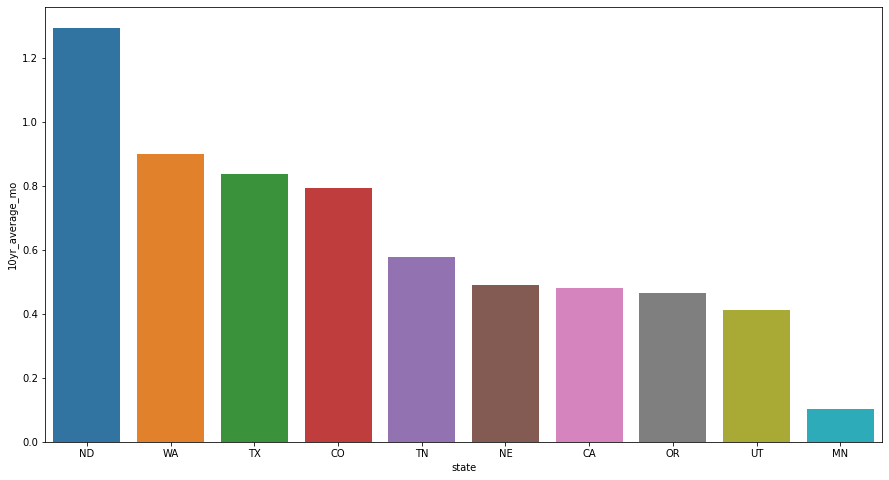

In [768]:
sns.barplot(x='state',y='10yr_average_mo',data=state_averages.sort_values('10yr_average_mo',ascending=False).head(10))

Looking at 10 year sharpe ratio which include the financial crisis of '08 WA, TX, CO, TN and CA are only states that where able to have positive sharpe ratios throughtout those volatile times pointing to a bit of safety in large market swings such as '08

<AxesSubplot:xlabel='state', ylabel='5yr_average_mo'>

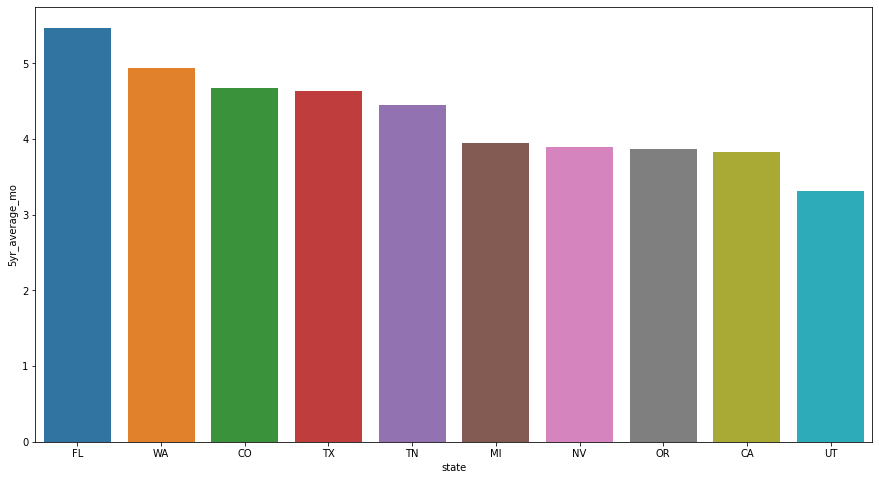

In [774]:
sns.barplot(x='state',y='5yr_average_mo',data=state_averages.sort_values('5yr_average_mo',ascending=False).head(10))

When only looking at 5yr sharpe ratios WA CO TX TN CA are still among the top 10 list but notice FL is now top performing state which may indicate that in FL, absent of a large downturn in the housing market, would provide the best risk adjusted returns

<AxesSubplot:xlabel='state', ylabel='5yr_average_y'>

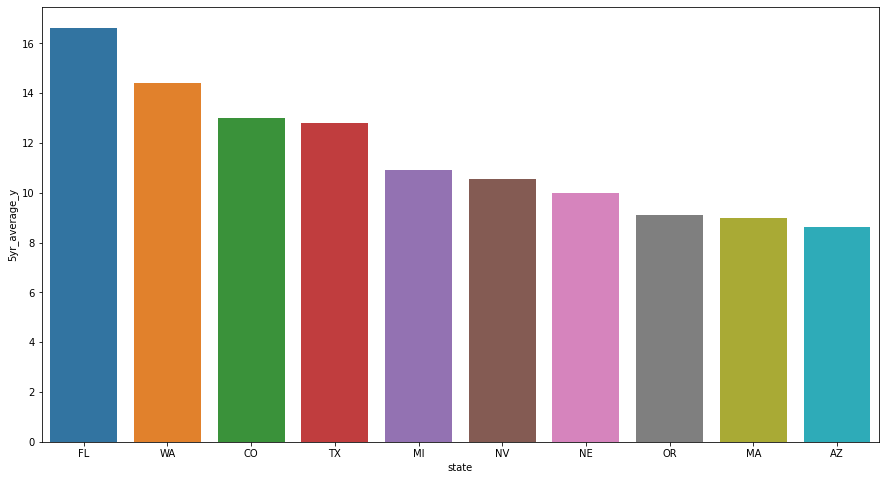

In [776]:
sns.barplot(x='state',y='5yr_average_y',data=state_averages.sort_values('5yr_average_y',ascending=False).head(10))

In [837]:
st10 = list(state_averages.sort_values('10yr_average_mo',ascending=False).state.head(10))
st10

['ND', 'WA', 'TX', 'CO', 'TN', 'NE', 'CA', 'OR', 'UT', 'MN']

In [838]:
st5 = list(state_averages.sort_values('5yr_average_mo',ascending=False).state.head(10))
st5

['FL', 'WA', 'CO', 'TX', 'TN', 'MI', 'NV', 'OR', 'CA', 'UT']

In [835]:
state_df =[]

Text(0.5, 1.0, 'Top 5 States by 5 year Average Sharpe Ratio (monthly)')

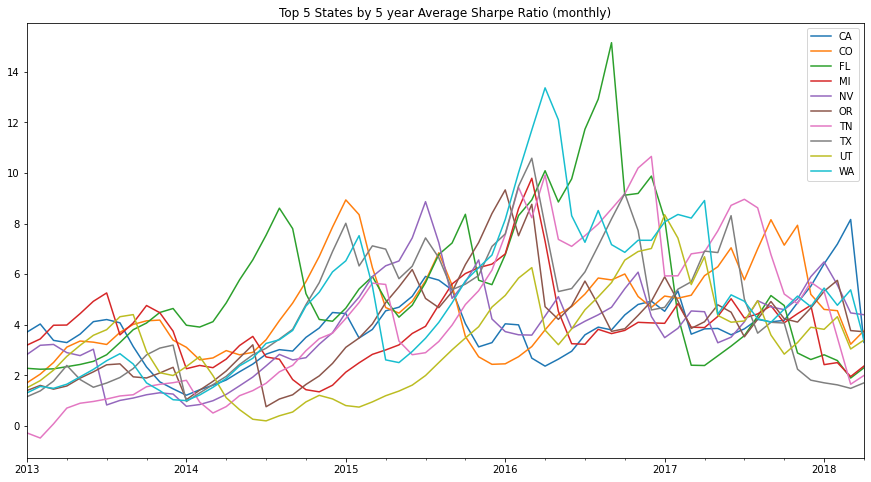

In [836]:
for state_df in state_dfs:
    for x in st5:
        if x in state_df.columns[0]:
            state_df['2013':'2018'].sharpe_ratio_monthly.plot(label=state_df.columns[0])
        else: continue
plt.legend()
plt.title('Top 5 States by 5 year Average Sharpe Ratio (monthly)')

In [824]:
st1 = list(state_averages.sort_values('1yr_average_mo',ascending=False).state.head(10))
st1

['WI', 'CO', 'TN', 'WA', 'CA', 'MO', 'NV', 'OR', 'MA', 'AZ']

Text(0.5, 1.0, 'Top 10 States by 1 year Sharpe Ratio (annual)')

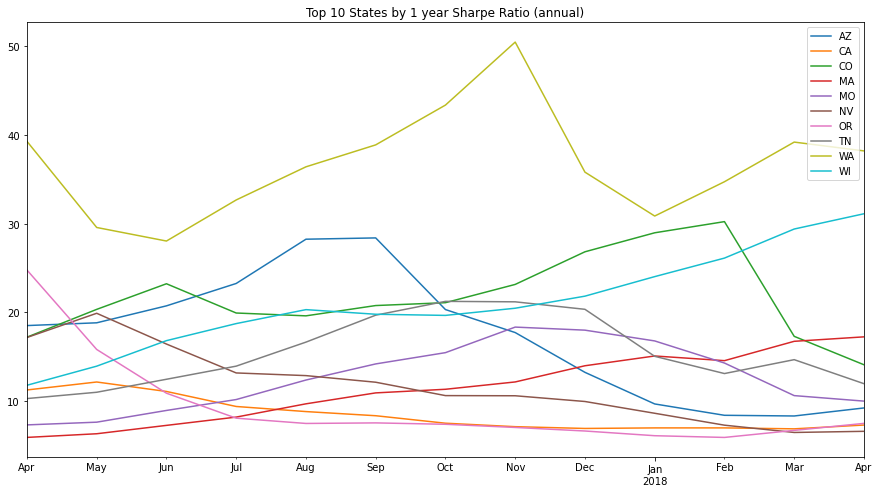

In [828]:
for state_df in state_dfs:
    for x in st1:
        if x in state_df.columns[0]:
            state_df['2017-04-01':'2018'].sharpe_ratio_annual.plot(label=state_df.columns[0])
        else: continue
plt.legend()
plt.title('Top 10 States by 1 year Sharpe Ratio (annual)')

Text(0.5, 1.0, 'Top 10 States by 10 year Sharpe Ratio (annual)')

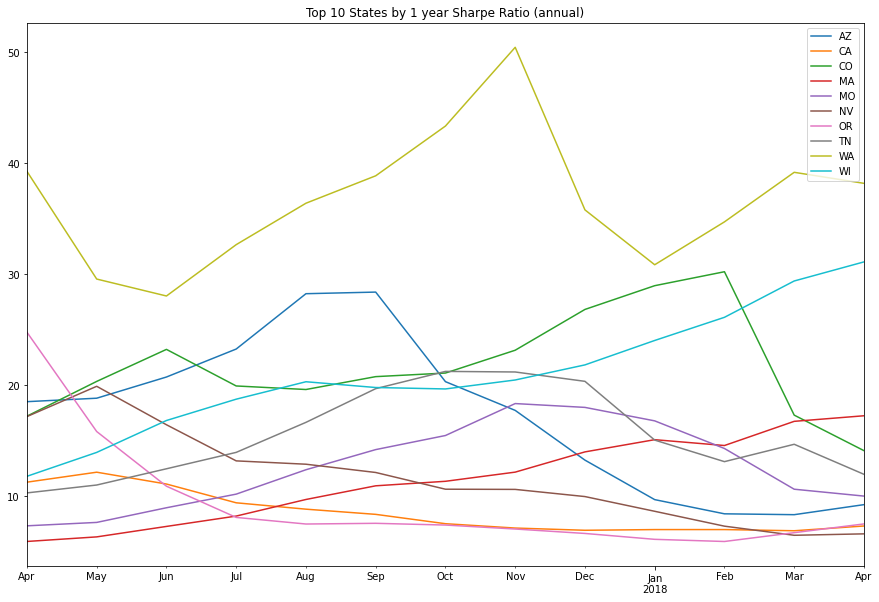

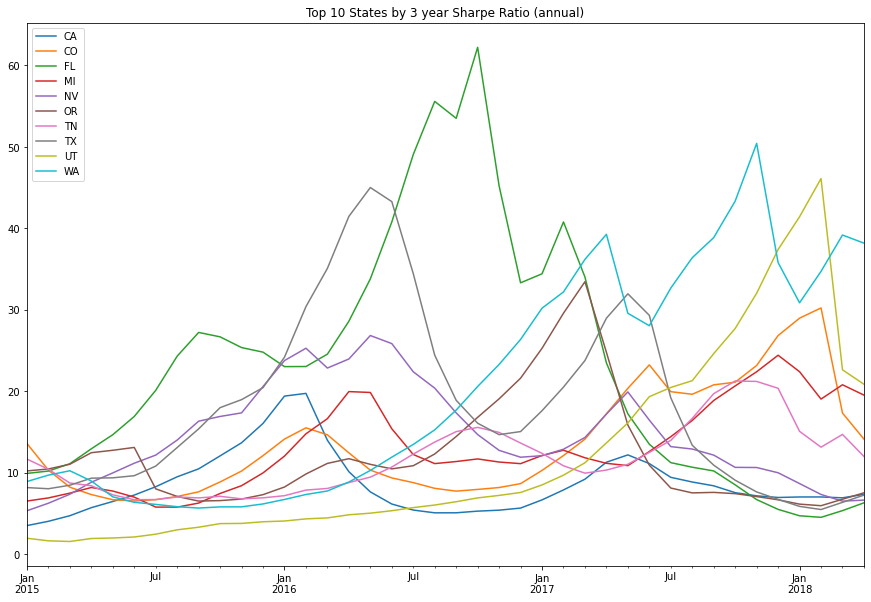

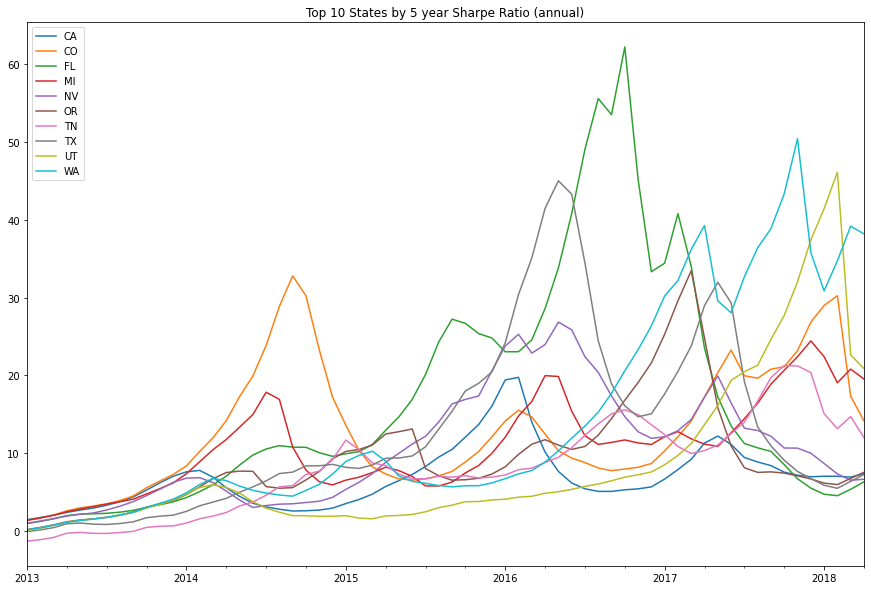

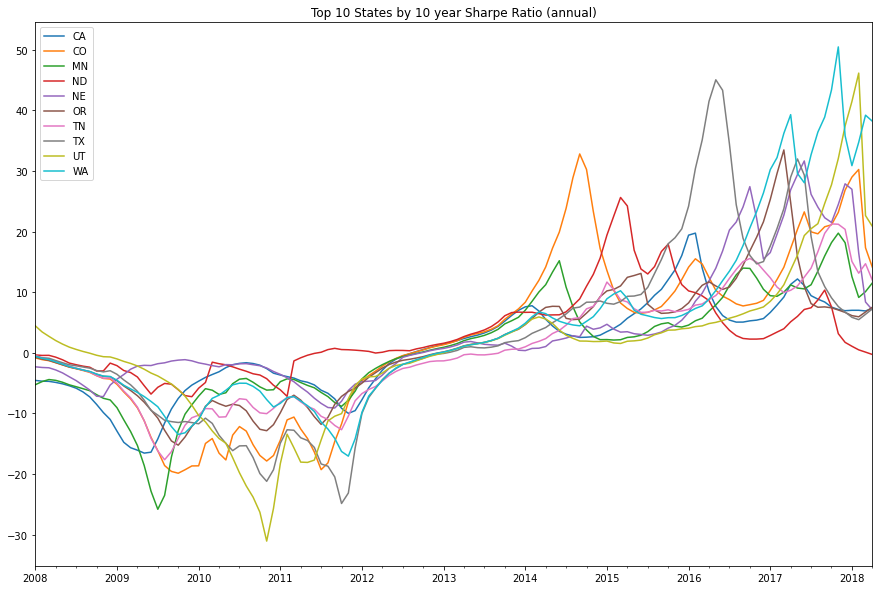

In [844]:
fig1, ax1 = plt.subplots(figsize=(15,10))
for state_df in state_dfs:
    for x in st1:
        if x in state_df.columns[0]:
            state_df['2017-04-01':'2018'].sharpe_ratio_annual.plot(label=state_df.columns[0],ax=ax1)
        else: continue
plt.legend()
plt.title('Top 10 States by 1 year Sharpe Ratio (annual)')

fig, ax = plt.subplots(figsize=(15,10))
for state_df in state_dfs:
    for x in st5:
        if x in state_df.columns[0]:
            state_df['2015':].sharpe_ratio_annual.plot(label=state_df.columns[0])
        else: continue
plt.legend()
plt.title('Top 10 States by 3 year Sharpe Ratio (annual)')



fig2, ax2 = plt.subplots(figsize=(15,10))
for state_df in state_dfs:
    for x in st5:
        if x in state_df.columns[0]:
            state_df['2013':'2018'].sharpe_ratio_annual.plot(label=state_df.columns[0],ax=ax2)
        else: continue
plt.legend()
plt.title('Top 10 States by 5 year Sharpe Ratio (annual)')

fig3, ax3 = plt.subplots(figsize=(15,10))
for state_df in state_dfs:
    for x in st10:
        if x in state_df.columns[0]:
            state_df['2008':'2018'].sharpe_ratio_annual.plot(label=state_df.columns[0],ax=ax3)
        else: continue
plt.legend()
plt.title('Top 10 States by 10 year Sharpe Ratio (annual)')

Looking at the most recent year, Washington, Wisconsin, and Massachussets are highest performing states wrt sharpe ratio

For 3 year time horizon, this remains the same, and with broader context these states are in an uptrend

for 5 year also same results but this in on YoY comparison so smoothes out trends

Text(0.5, 1.0, 'Top 10 States by 5 year Sharpe Ratio (mo)')

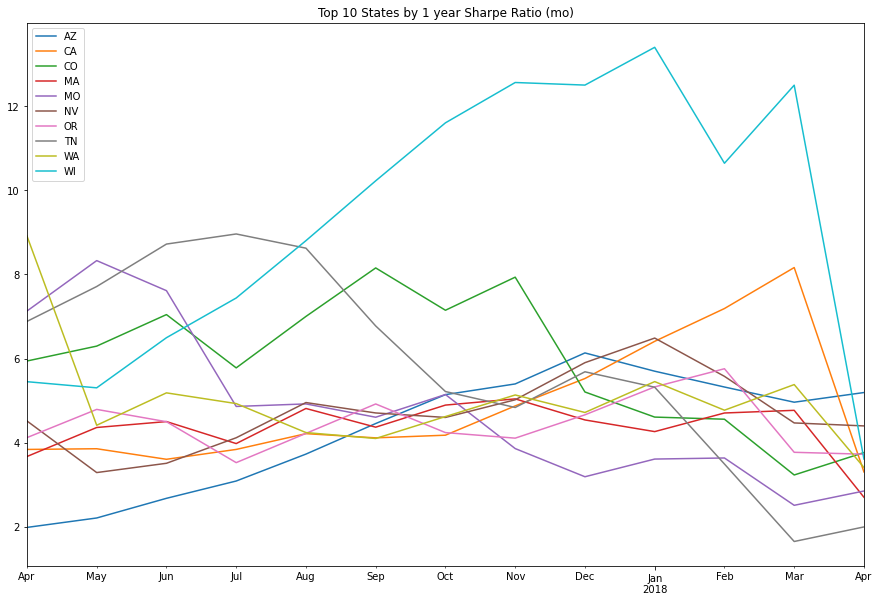

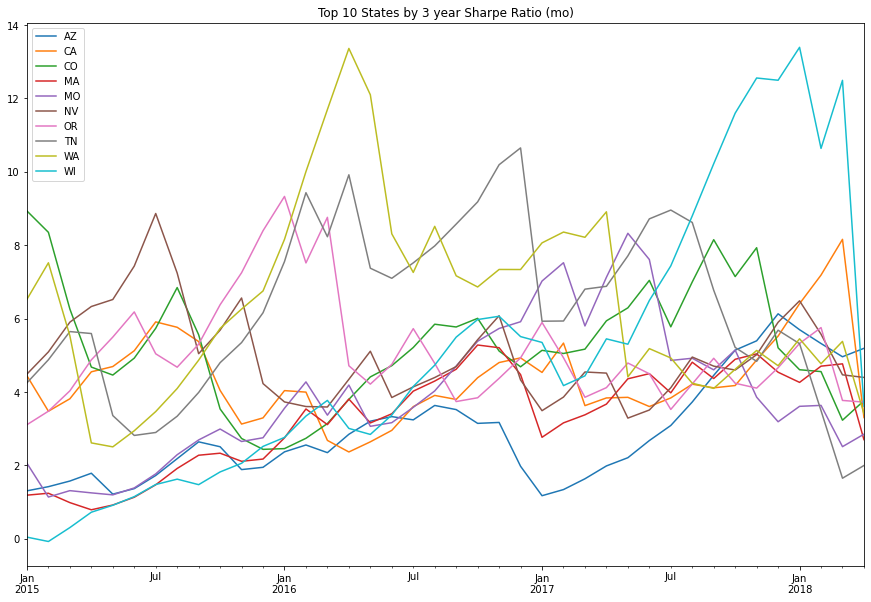

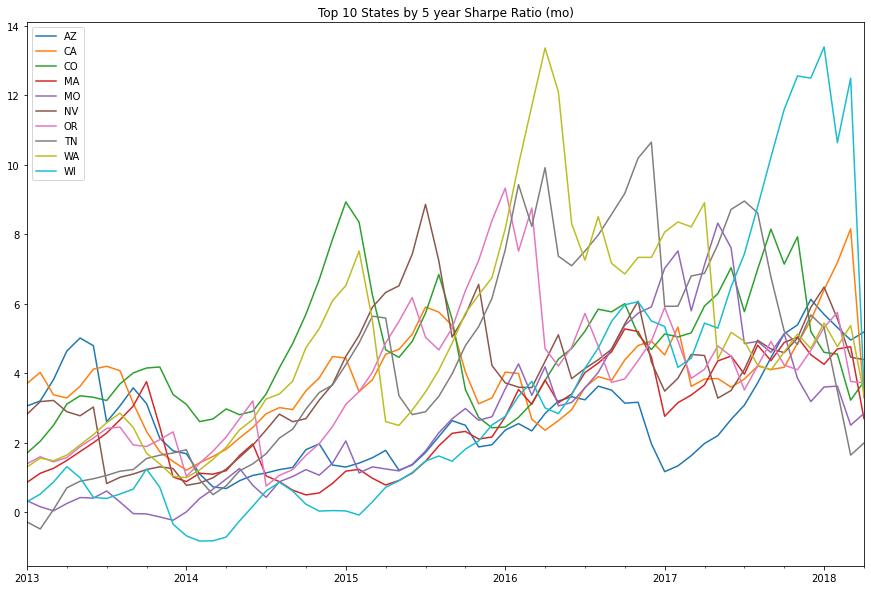

In [833]:
fig1, ax1 = plt.subplots(figsize=(15,10))
for state_df in state_dfs:
    for x in st1:
        if x in state_df.columns[0]:
            state_df['2017-04-01':'2018'].sharpe_ratio_monthly.plot(label=state_df.columns[0],ax=ax1)
        else: continue
plt.legend()
plt.title('Top 10 States by 1 year Sharpe Ratio (mo)')

fig, ax = plt.subplots(figsize=(15,10))
for state_df in state_dfs:
    for x in st1:
        if x in state_df.columns[0]:
            state_df['2015':].sharpe_ratio_monthly.plot(label=state_df.columns[0])
        else: continue
plt.legend()
plt.title('Top 10 States by 3 year Sharpe Ratio (mo)')



fig2, ax2 = plt.subplots(figsize=(15,10))
for state_df in state_dfs:
    for x in st1:
        if x in state_df.columns[0]:
            state_df['2013':'2018'].sharpe_ratio_monthly.plot(label=state_df.columns[0],ax=ax2)
        else: continue
plt.legend()
plt.title('Top 10 States by 5 year Sharpe Ratio (mo)')


Looking at our monthly trends we still see wisconsin but now CA and even AZ are in top 3 category with AZ getting attention as all states home prices broadly must've taken a hit.

In [705]:
average_sharp_10 = []
for state in state_dfs:
    average_sharp_10.append((state.columns[0],state['2008':'2018'].sharpe_ratio_monthly.mean()))

In [ ]:
average_sharp_10 = np.array(average_sharp_10)
average_sharp_10 = pd.DataFrame(data=average_sharp_10)
average_sharp_10.rename(columns={0:'state',1:'average_sharp_monthly_10yr'},inplace=True)
average_sharp_10.average_sharp_monthly_10yr = average_sharp_10.average_sharp_monthly_10yr.map(lambda x: np.float(x))
average_sharp_10 = average_sharp_10.sort_values('average_sharp_monthly_10yr',ascending=False)

In [698]:
average_sharp_5 = []
for state in state_dfs:
    average_sharp_5.append((state.columns[0],state['2013':'2018'].sharpe_ratio_monthly.mean()))


In [699]:
average_sharp_5 = np.array(average_sharp_5)

In [700]:
average_sharp_5 = pd.DataFrame(data=average_sharp_5)

In [701]:
average_sharp_5.rename(columns={0:'state',1:'average_sharp_monthly_5yr'},inplace=True)

In [702]:
average_sharp_5.average_sharp_monthly_5yr = average_sharp_5.average_sharp_monthly_5yr.map(lambda x: np.float(x))
average_sharp_5 = average_sharp_5.sort_values('average_sharp_monthly_5yr',ascending=False)

In [703]:
average_sharp_5.head(10)

,state,average_sharp_monthly_5yr
9,FL,5.473808
47,WA,4.943066
5,CO,4.671165
43,TX,4.641847
42,TN,4.447117
22,MI,3.955427
33,NV,3.901653
37,OR,3.874131
4,CA,3.825827
44,UT,3.316183


Text(0.5, 1.0, 'Top 10 States by Sharpe Ratio 5 year monthly')

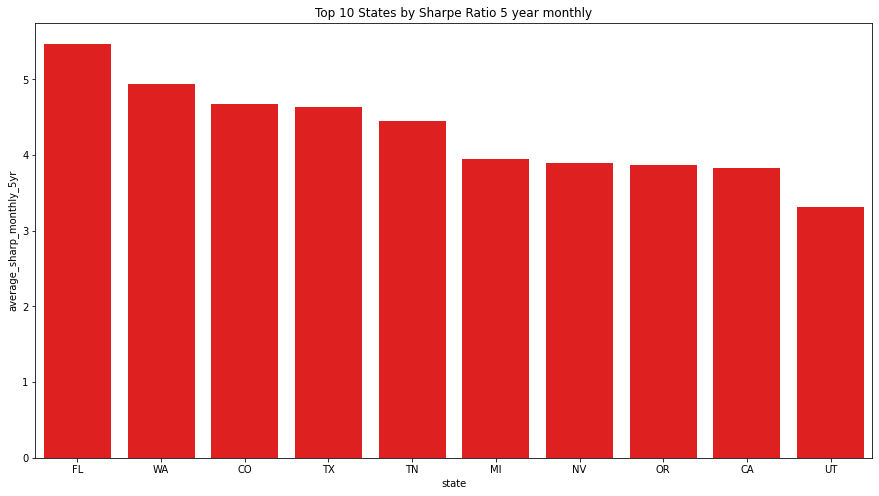

In [704]:
sns.barplot(x='state',y='average_sharp_monthly_5yr',data=average_sharp_5.head(10),color='red')
plt.title("Top 10 States by Sharpe Ratio 5 year monthly")

<AxesSubplot:xlabel='state', ylabel='average_sharp_annual_5yr'>

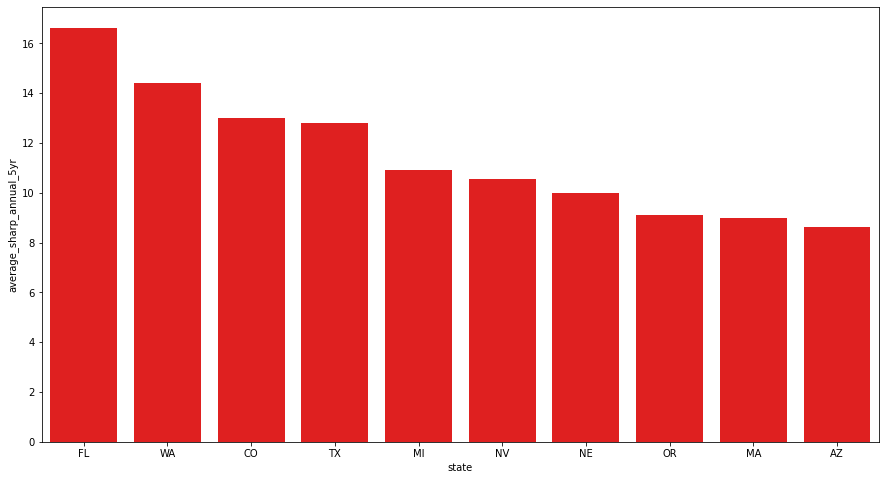

In [683]:
sns.barplot(x='state',y='average_sharp_annual_5yr',data=average_sharp.head(10),color='red')
plt.title("Top 10 States by Sharpe Ratio 5 year annual")

In [498]:
state_dfs = []
for x in state_list:
    x = pd.DataFrame(data = states[x],)
    state_dfs.append(x)

In [594]:
state_dfs

[                   AK  ROI_MoM  ROI_YoY  EMA_6MO_roi_mo  EMA_6MO_std_mo  \
 1996-04-01  128382.14   0.0000   0.0000        0.000000             NaN   
 1996-05-01  128832.14   0.0035   0.0000        0.001000        0.002475   
 1996-06-01  129253.57   0.0033   0.0000        0.001657        0.002156   
 1996-07-01  129639.29   0.0030   0.0000        0.002041        0.001828   
 1996-08-01  130028.57   0.0030   0.0000        0.002315        0.001569   
 ...               ...      ...      ...             ...             ...   
 2017-12-01  322657.14   0.0040   0.0240        0.002943        0.001162   
 2018-01-01  323775.00   0.0035   0.0278        0.003102        0.001020   
 2018-02-01  324167.86   0.0012   0.0287        0.002559        0.001277   
 2018-03-01  323692.86  -0.0015   0.0262        0.001399        0.002280   
 2018-04-01  323046.43  -0.0020   0.0220        0.000428        0.002558   
 
             EMA_6MO_roi_y  EMA_6MO_std_y       rfr  sharpe_ratio_monthly  \
 1996-04-

## Making list of dfs then adding all relevant columns to plot

In [ ]:
state_dfs = []
for x in state_list:
    x = pd.DataFrame(data = states[x],)
    state_dfs.append(x)

In [544]:
for state_df in state_dfs:
    state_df['ROI_MoM'] = np.zeros((265))
    state_df['ROI_YoY'] = np.zeros((265))
    for x in range(0,265):    
        if x + 1 <265:
            state_df.iloc[x+1,1] = round((state_df.iloc[x+1,0] - state_df.iloc[x,0])/state_df.iloc[x,0],4)
        else: break
    for x in range(0,265):    
        if x + 12 <265:
            state_df.iloc[x+12,2] = round((state_df.iloc[x+12,0] - state_df.iloc[x,0])/state_df.iloc[x,0],4)
        else: break
    state_df['EMA_6MO_roi_mo'] = state_df.ROI_MoM.ewm(span=6,adjust=False).mean()
    state_df['EMA_6MO_std_mo'] = state_df.ROI_MoM.ewm(span=6,adjust=False).std()
    state_df['EMA_6MO_roi_y'] = state_df.ROI_YoY.ewm(span=6,adjust=False).mean()
    state_df['EMA_6MO_std_y'] = state_df.ROI_YoY.ewm(span=6,adjust=False).std()
    state_df['rfr'] = rfr.DGS10
    state_df['sharpe_ratio_monthly'] = (state_df['EMA_6MO_roi_mo'] - (state_df.rfr/12))/state_df['EMA_6MO_std_mo']
    state_df['sharpe_ratio_annual'] = (state_df['EMA_6MO_roi_y'] - (state_df.rfr))/state_df['EMA_6MO_std_y']

In [549]:
state_dfs[4]

,CA,ROI_MoM,ROI_YoY,EMA_6MO_roi_mo,EMA_6MO_std_mo,EMA_6MO_roi_y,EMA_6MO_std_y,rfr,sharpe_ratio_monthly,sharpe_ratio_annual
1996-04-01,200220.96,0.0000,0.0000,0.000000,NaN,0.000000,NaN,0.065114,NaN,NaN
1996-05-01,200124.83,-0.0005,0.0000,-0.000143,0.000354,0.000000,0.000000,0.067368,-16.282894,-inf
1996-06-01,200035.94,-0.0004,0.0000,-0.000216,0.000285,0.000000,0.000000,0.069120,-20.996920,-inf
1996-07-01,199965.57,-0.0004,0.0000,-0.000269,0.000243,0.000000,0.000000,0.068655,-24.684338,-inf
1996-08-01,199958.75,-0.0000,0.0000,-0.000192,0.000241,0.000000,0.000000,0.066355,-23.735333,-inf
...,...,...,...,...,...,...,...,...,...,...
2017-12-01,723263.48,0.0091,0.0912,0.008464,0.001170,0.083557,0.008567,0.024025,5.524181,6.948790
2018-01-01,729496.41,0.0086,0.0930,0.008503,0.000991,0.086255,0.008618,0.025838,6.407931,7.010879
2018-02-01,735525.98,0.0083,0.0955,0.008445,0.000843,0.088897,0.008601,0.028589,7.187402,7.011715
2018-03-01,742146.32,0.0090,0.1004,0.008604,0.000764,0.092183,0.009233,0.028424,8.161314,6.905676


In [557]:
state_dfs[0].columns[0]

'AK'

In [572]:
state_dfs[0]['2013':'2018'].sharpe_ratio_annual.mean()

-1.0251111485837134

In [ ]:
state_dfs

In [582]:
all_test = pd.concat(state_dfs,axis=1)

In [583]:
all_test.groupby()

,AK,ROI_MoM,ROI_YoY,EMA_6MO_roi_mo,EMA_6MO_std_mo,EMA_6MO_roi_y,EMA_6MO_std_y,rfr,sharpe_ratio_monthly,sharpe_ratio_annual,...,WY,ROI_MoM,ROI_YoY,EMA_6MO_roi_mo,EMA_6MO_std_mo,EMA_6MO_roi_y,EMA_6MO_std_y,rfr,sharpe_ratio_monthly,sharpe_ratio_annual
1996-04-01,128382.14,0.0000,0.0000,0.000000,NaN,0.000000,NaN,0.065114,NaN,NaN,...,138712.50,0.0000,0.0000,0.000000,NaN,0.000000,NaN,0.065114,NaN,NaN
1996-05-01,128832.14,0.0035,0.0000,0.001000,0.002475,0.000000,0.000000,0.067368,-1.864344,-inf,...,138762.50,0.0004,0.0000,0.000114,0.000283,0.000000,0.000000,0.067368,-19.444480,-inf
1996-06-01,129253.57,0.0033,0.0000,0.001657,0.002156,0.000000,0.000000,0.069120,-1.902986,-inf,...,138741.67,-0.0002,0.0000,0.000024,0.000266,0.000000,0.000000,0.069120,-21.594973,-inf
1996-07-01,129639.29,0.0030,0.0000,0.002041,0.001828,0.000000,0.000000,0.068655,-2.013413,-inf,...,138641.67,-0.0007,0.0000,-0.000183,0.000437,0.000000,0.000000,0.068655,-13.501211,-inf
1996-08-01,130028.57,0.0030,0.0000,0.002315,0.001569,0.000000,0.000000,0.066355,-2.048838,-inf,...,138533.33,-0.0008,0.0000,-0.000359,0.000477,0.000000,0.000000,0.066355,-12.353395,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,322657.14,0.0040,0.0240,0.002943,0.001162,0.015722,0.007464,0.024025,0.809399,-1.112529,...,227525.81,0.0045,0.0201,0.003427,0.001787,0.013143,0.006844,0.024025,0.797552,-1.589982
2018-01-01,323775.00,0.0035,0.0278,0.003102,0.001020,0.019173,0.008690,0.025838,0.929995,-0.767032,...,228564.52,0.0046,0.0259,0.003762,0.001618,0.016788,0.008562,0.025838,0.994596,-1.056987
2018-02-01,324167.86,0.0012,0.0287,0.002559,0.001277,0.021895,0.008728,0.028589,0.137988,-0.767084,...,229938.71,0.0060,0.0326,0.004402,0.001759,0.021306,0.010658,0.028589,1.147563,-0.683403
2018-03-01,323692.86,-0.0015,0.0262,0.001399,0.002280,0.023125,0.007678,0.028424,-0.425301,-0.690185,...,230996.77,0.0046,0.0370,0.004458,0.001490,0.025790,0.011894,0.028424,1.402168,-0.221458


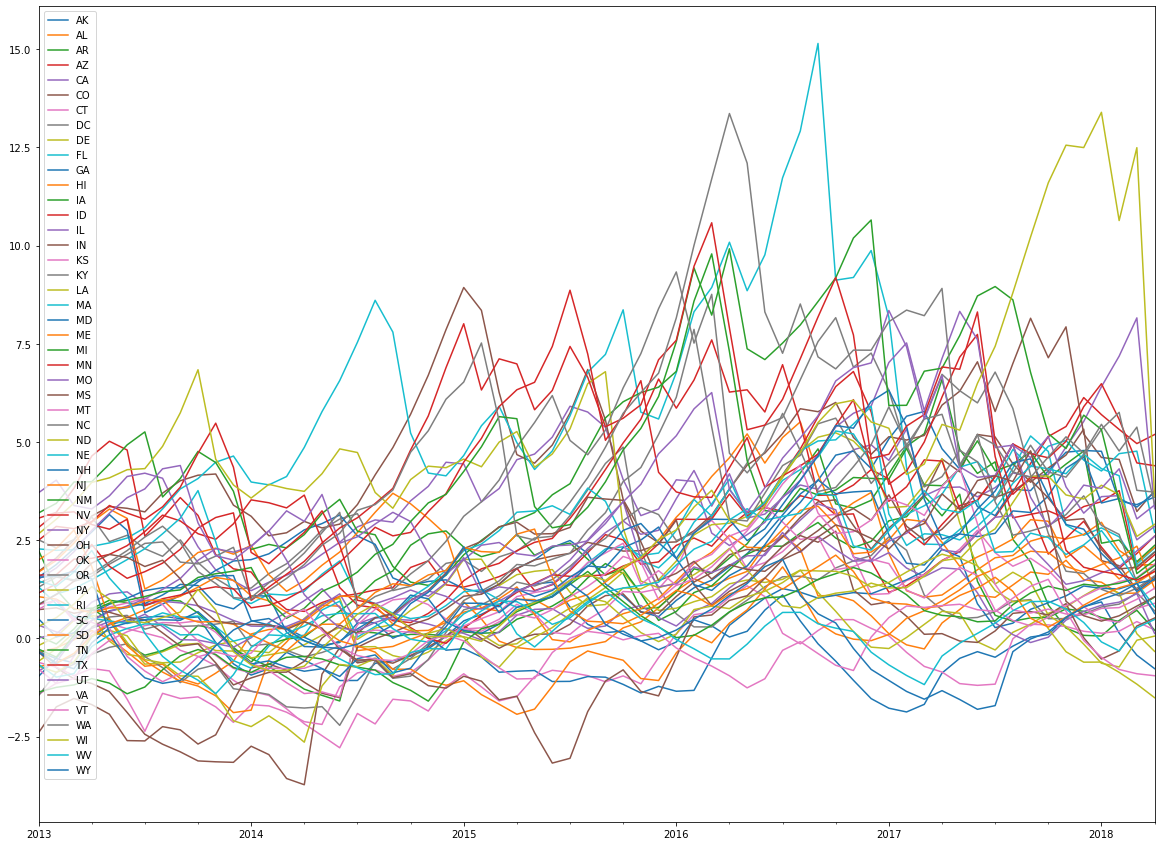

In [574]:
fig, ax = plt.subplots(figsize=(20,15))
for state_df in state_dfs:
    state_df['2013':'2018'].sharpe_ratio_monthly.plot(label =state_df.columns[0], ax=ax)
plt.legend(loc=2)

In [527]:
for state_df in state_dfs:
    state_df = pd.concat([state_df,rfr],axis=1)

In [528]:
state_dfs

[                   AK  ROI_MoM  ROI_YoY
 1996-04-01  128382.14   0.0000   0.0000
 1996-05-01  128832.14   0.0035   0.0000
 1996-06-01  129253.57   0.0033   0.0000
 1996-07-01  129639.29   0.0030   0.0000
 1996-08-01  130028.57   0.0030   0.0000
 ...               ...      ...      ...
 2017-12-01  322657.14   0.0040   0.0240
 2018-01-01  323775.00   0.0035   0.0278
 2018-02-01  324167.86   0.0012   0.0287
 2018-03-01  323692.86  -0.0015   0.0262
 2018-04-01  323046.43  -0.0020   0.0220
 
 [265 rows x 3 columns],
                    AL  ROI_MoM  ROI_YoY
 1996-04-01   86795.57   0.0000   0.0000
 1996-05-01   87122.15   0.0038   0.0000
 1996-06-01   87460.76   0.0039   0.0000
 1996-07-01   87798.73   0.0039   0.0000
 1996-08-01   88156.96   0.0041   0.0000
 ...               ...      ...      ...
 2017-12-01  151629.51   0.0044   0.0337
 2018-01-01  152402.73   0.0051   0.0376
 2018-02-01  153625.68   0.0080   0.0447
 2018-03-01  155504.37   0.0122   0.0554
 2018-04-01  157033.88   0.009

In [524]:
for state_df in state_dfs:
    state_df = pd.concat([state_df,rfr],axis=1)
    state_df['EMA_6MO_roi_mo'] = state_df.ROI_MoM.ewm(span=6,adjust=False).mean()
    state_df['EMA_6MO_std_mo'] = state_df.ROI_MoM.ewm(span=6,adjust=False).std()
    state_df['EMA_6MO_roi_y'] = state_df.ROI_YoY.ewm(span=6,adjust=False).mean()
    state_df['EMA_6MO_std_y'] = state_df.ROI_YoY.ewm(span=6,adjust=False).std()
    state_df['sharpe_ratio_monthly'] = (state_df['EMA_6MO_roi_mo'] - (state_df.DGS10/12))/state_df['EMA_6MO_std_mo']
    state_df['sharpe_ratio_annual'] = (state_df['EMA_6MO_roi_y'] - (state_df.DGS10))/state_df['EMA_6MO_std_y']

NameError: name 'AK' is not defined

In [ ]:
t = pd.concat([CA_ROI.resample("MS").mean(),rfr],axis=1)

t['EMA_2MO_roi_mo'] = t.ROI_MoM.ewm(span=2,adjust=False).mean()
t['EMA_2MO_std_mo'] = t.ROI_MoM.ewm(span=2,adjust=False).std()
t['EMA_2MO_roi_y'] = t.ROI_YoY.ewm(span=2,adjust=False).mean()
t['EMA_2MO_std_y'] = t.ROI_YoY.ewm(span=2,adjust=False).std()
t['sharpe_ratio_monthly'] = (t['EMA_2MO_roi_mo'] - (t.DGS10/12))/t['EMA_2MO_std_mo']
t['sharpe_ratio_annual'] = (t['EMA_2MO_roi_y'] - (t.DGS10))/t['EMA_2MO_std_y']
t

In [504]:
state_dfs

[                   AK  ROI_MoM  ROI_YoY
 1996-04-01  128382.14   0.0000      0.0
 1996-05-01  128832.14   0.0035      0.0
 1996-06-01  129253.57   0.0033      0.0
 1996-07-01  129639.29   0.0030      0.0
 1996-08-01  130028.57   0.0030      0.0
 ...               ...      ...      ...
 2017-12-01  322657.14   0.0240      0.0
 2018-01-01  323775.00   0.0278      0.0
 2018-02-01  324167.86   0.0287      0.0
 2018-03-01  323692.86   0.0262      0.0
 2018-04-01  323046.43   0.0220      0.0
 
 [265 rows x 3 columns],
                    AL  ROI_MoM  ROI_YoY
 1996-04-01   86795.57   0.0000      0.0
 1996-05-01   87122.15   0.0038      0.0
 1996-06-01   87460.76   0.0039      0.0
 1996-07-01   87798.73   0.0039      0.0
 1996-08-01   88156.96   0.0041      0.0
 ...               ...      ...      ...
 2017-12-01  151629.51   0.0337      0.0
 2018-01-01  152402.73   0.0376      0.0
 2018-02-01  153625.68   0.0447      0.0
 2018-03-01  155504.37   0.0554      0.0
 2018-04-01  157033.88   0.062

In [550]:
t = pd.concat([CA_ROI.resample("MS").mean(),rfr],axis=1)

t['EMA_2MO_roi_mo'] = t.ROI_MoM.ewm(span=6,adjust=False).mean()
t['EMA_2MO_std_mo'] = t.ROI_MoM.ewm(span=6,adjust=False).std()
t['EMA_2MO_roi_y'] = t.ROI_YoY.ewm(span=6,adjust=False).mean()
t['EMA_2MO_std_y'] = t.ROI_YoY.ewm(span=6,adjust=False).std()
t['sharpe_ratio_monthly'] = (t['EMA_2MO_roi_mo'] - (t.DGS10/12))/t['EMA_2MO_std_mo']
t['sharpe_ratio_annual'] = (t['EMA_2MO_roi_y'] - (t.DGS10))/t['EMA_2MO_std_y']
t

,CA,ROI_MoM,ROI_YoY,DGS10,EMA_2MO_roi_mo,EMA_2MO_std_mo,EMA_2MO_roi_y,EMA_2MO_std_y,sharpe_ratio_monthly,sharpe_ratio_annual
1996-04-01,200220.96,0.0000,0.0000,0.065114,0.000000,NaN,0.000000,NaN,NaN,NaN
1996-05-01,200124.83,-0.0005,0.0000,0.067368,-0.000143,0.000354,0.000000,0.000000,-16.282894,-inf
1996-06-01,200035.94,-0.0004,0.0000,0.069120,-0.000216,0.000285,0.000000,0.000000,-20.996920,-inf
1996-07-01,199965.57,-0.0004,0.0000,0.068655,-0.000269,0.000243,0.000000,0.000000,-24.684338,-inf
1996-08-01,199958.75,0.0000,0.0000,0.066355,-0.000192,0.000241,0.000000,0.000000,-23.735333,-inf
...,...,...,...,...,...,...,...,...,...,...
2017-12-01,723263.48,0.0091,0.0912,0.024025,0.008464,0.001170,0.083557,0.008567,5.524181,6.948790
2018-01-01,729496.41,0.0086,0.0930,0.025838,0.008503,0.000991,0.086255,0.008618,6.407931,7.010879
2018-02-01,735525.98,0.0083,0.0955,0.028589,0.008445,0.000843,0.088897,0.008601,7.187402,7.011715
2018-03-01,742146.32,0.0090,0.1004,0.028424,0.008604,0.000764,0.092183,0.009233,8.161314,6.905676


In [471]:
t.columns

Index(['CA', 'ROI_MoM', 'ROI_YoY', 'DGS10', 'EMA_2MO_roi_mo', 'EMA_2MO_std_mo',
       'EMA_2MO_roi_y', 'EMA_2MO_std_y', 'sharpe_ratio_monthly',
       'sharpe_ratio_annual'],
      dtype='object')

<AxesSubplot:>

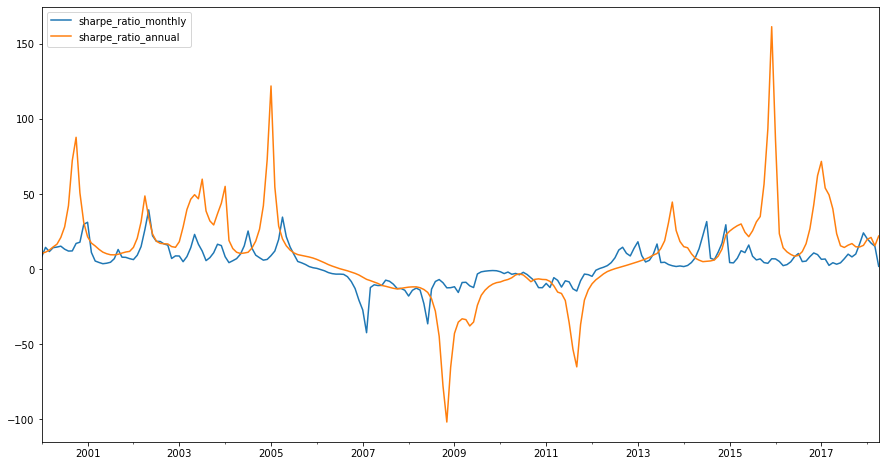

In [494]:
t['2000':'2018'].drop(['CA', 'ROI_MoM', 'ROI_YoY', 'DGS10', 'EMA_2MO_roi_mo', 'EMA_2MO_std_mo',
       'EMA_2MO_roi_y', 'EMA_2MO_std_y'],axis=1).plot()

## Above have CA all relevant columns, need to make loop for all states to compare and then go to counties and zip

In [211]:
CA['EMA_2MO_price'] = CA.CA.ewm(span=2,adjust=False).mean()
CA['EMA_3MO_price'] = CA.CA.ewm(span=3,adjust=False).mean()
CA['EMA_6MO_price'] = CA.CA.ewm(span=6,adjust=False).mean()
CA['EMA_2MO_std'] = CA.CA.ewm(span=2,adjust=False).std()
CA['EMA_3MO_std'] = CA.CA.ewm(span=3,adjust=False).std()
CA['EMA_6MO_std'] = CA.CA.ewm(span=6,adjust=False).std()

In [281]:
CA_2 = CA.resample('MS').mean()

In [295]:
test = pd.concat([CA_2,rfr])

In [296]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 530 entries, 1996-04-01 to 2018-04-01
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CA             265 non-null    float64
 1   EMA_2MO_price  265 non-null    float64
 2   EMA_3MO_price  265 non-null    float64
 3   EMA_6MO_price  265 non-null    float64
 4   EMA_2MO_std    264 non-null    float64
 5   EMA_3MO_std    264 non-null    float64
 6   EMA_6MO_std    264 non-null    float64
 7   DGS10          265 non-null    float64
dtypes: float64(8)
memory usage: 37.3 KB


<AxesSubplot:>

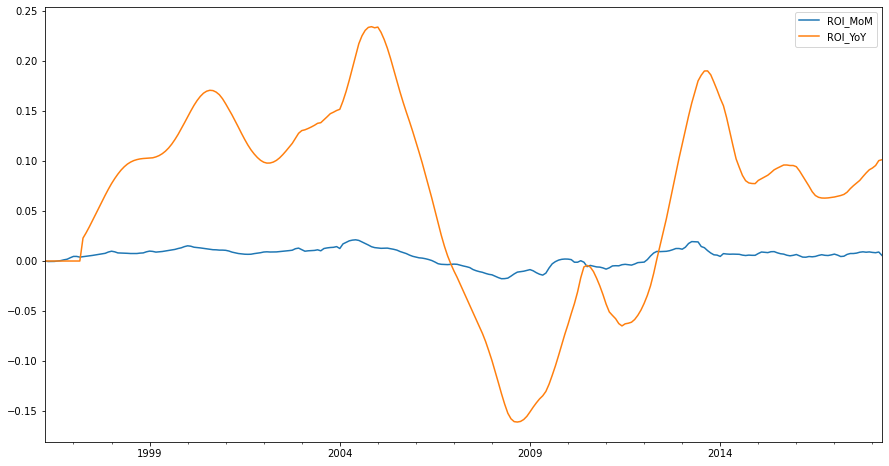

In [493]:
CA_ROI.drop('CA',axis=1).plot()

<AxesSubplot:>

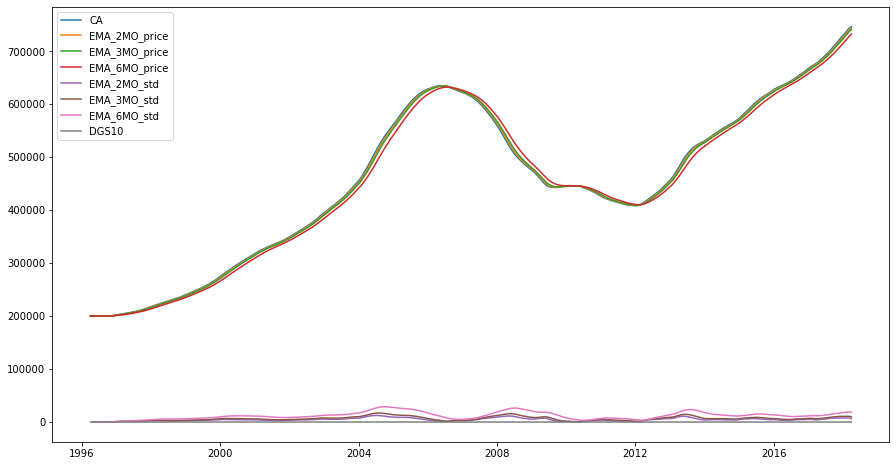

In [298]:
sns.lineplot(data=test,dashes=False,ci=None)

<AxesSubplot:>

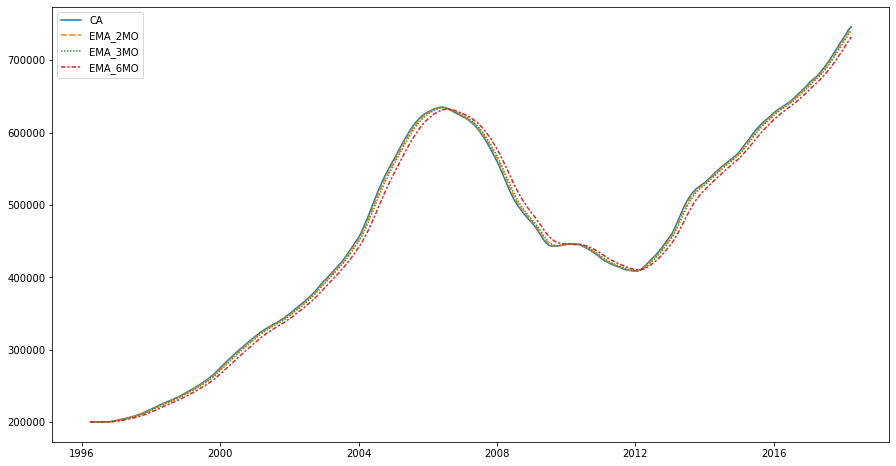

In [202]:
sns.lineplot(data=CA)

In [ ]:
EMA_2MO = pd.DataFrame(data=None)
for x in years:
    EMA_2MO['state'] = states_roi['state']
    if x +1 < 2019:
        blank[x+1] = (states_roi[x+1] - states_roi[x])/ states_roi[x]
    else:
        break

In [152]:
df.columns.values[7:] = get_datetimes(df)

In [153]:
df2 = df.copy()

In [129]:
state = df2.groupby('State').agg(['mean']).drop(columns=['RegionID','RegionName','SizeRank'],axis=1)

In [141]:
state

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
State,,,,,,,,,,,,,,,,,,,,,
AK,128382.142857,128832.142857,129253.571429,129639.285714,130028.571429,130367.857143,130710.714286,131085.714286,131557.142857,132107.142857,...,317921.428571,318610.714286,319382.142857,320185.714286,321378.571429,322657.142857,323775.000000,324167.857143,323692.857143,323046.428571
AL,86795.569620,87122.151899,87460.759494,87798.734177,88156.962025,88531.012658,88918.987342,89327.848101,89800.632911,90325.949367,...,149255.191257,149675.956284,150125.136612,150537.704918,150969.945355,151629.508197,152402.732240,153625.683060,155504.371585,157033.879781
AR,68868.041237,69015.463918,69140.206186,69262.886598,69378.350515,69507.216495,69674.226804,69885.567010,70167.010309,70535.051546,...,131952.380952,132379.047619,132778.095238,132973.333333,133020.000000,133188.571429,133522.857143,134456.190476,136192.380952,137620.000000
AZ,116202.790698,116562.790698,116934.883721,117315.348837,117719.534884,118150.232558,118626.511628,119141.395349,119773.488372,120472.093023,...,257896.086957,259598.260870,261243.043478,262884.347826,264369.130435,265908.260870,267327.826087,268714.782609,270488.695652,271952.173913
CA,200220.959596,200124.831650,200035.942761,199965.572391,199958.754209,200037.626263,200277.020202,200643.013468,201309.680135,202229.124579,...,692367.156863,697869.607843,704045.669935,710515.114379,716760.866013,723263.480392,729496.405229,735525.980392,742146.323529,746329.084967
CO,142561.943320,142765.991903,142985.425101,143204.453441,143461.943320,143752.631579,144106.882591,144507.287449,145057.085020,145729.149798,...,384512.449799,386958.634538,389367.469880,391558.634538,393813.253012,396777.510040,399905.220884,403134.939759,407292.369478,410528.915663
CT,157189.516129,157063.709677,156926.612903,156778.225806,156640.322581,156525.806452,156462.903226,156439.516129,156570.161290,156846.774194,...,277025.806452,278666.129032,280383.870968,281137.096774,281725.000000,282175.806452,282852.419355,283826.612903,284893.548387,285431.451613
DC,189216.666667,188611.111111,188011.111111,187438.888889,186900.000000,186494.444444,186222.222222,186116.666667,186305.555556,186750.000000,...,779644.444444,782905.555556,785277.777778,786261.111111,788122.222222,790450.000000,793622.222222,798838.888889,804600.000000,806166.666667


In [119]:
test = pd.melt(df, id_vars=['RegionID','RegionName', 'City', 'State', 'Metro', 'CountyName','SizeRank'], var_name='time')
test['time'] = pd.to_datetime(test['time'],infer_datetime_format=True)
test = test.dropna(subset=['value'])


In [126]:
test

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,time,value
0,84654,60657,Chicago,IL,Chicago,Cook,1,1996-04-01,334200.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,1996-04-01,235700.0
2,91982,77494,Katy,TX,Houston,Harris,3,1996-04-01,210400.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04-01,498100.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,1996-04-01,77300.0
...,...,...,...,...,...,...,...,...,...
3901590,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,2018-04-01,209300.0
3901591,59107,3293,Woodstock,NH,Claremont,Grafton,14720,2018-04-01,225800.0
3901592,75672,40404,Berea,KY,Richmond,Madison,14721,2018-04-01,133400.0
3901593,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,2018-04-01,664400.0


In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
for state_df in state_dfs:
    state_df['2013':'2018'].sharpe_ratio_monthly.plot(label =state_df.columns[0], ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
for state_df in state_dfs:
    state_df['2013':'2018'].sharpe_ratio_monthly.plot(label =state_df.columns[0], ax=ax)
plt.legend(loc=2)

In [584]:
import plotly.express as px


In [593]:
px.line(state_df['2008':'2018'].sharpe_ratio_annual)

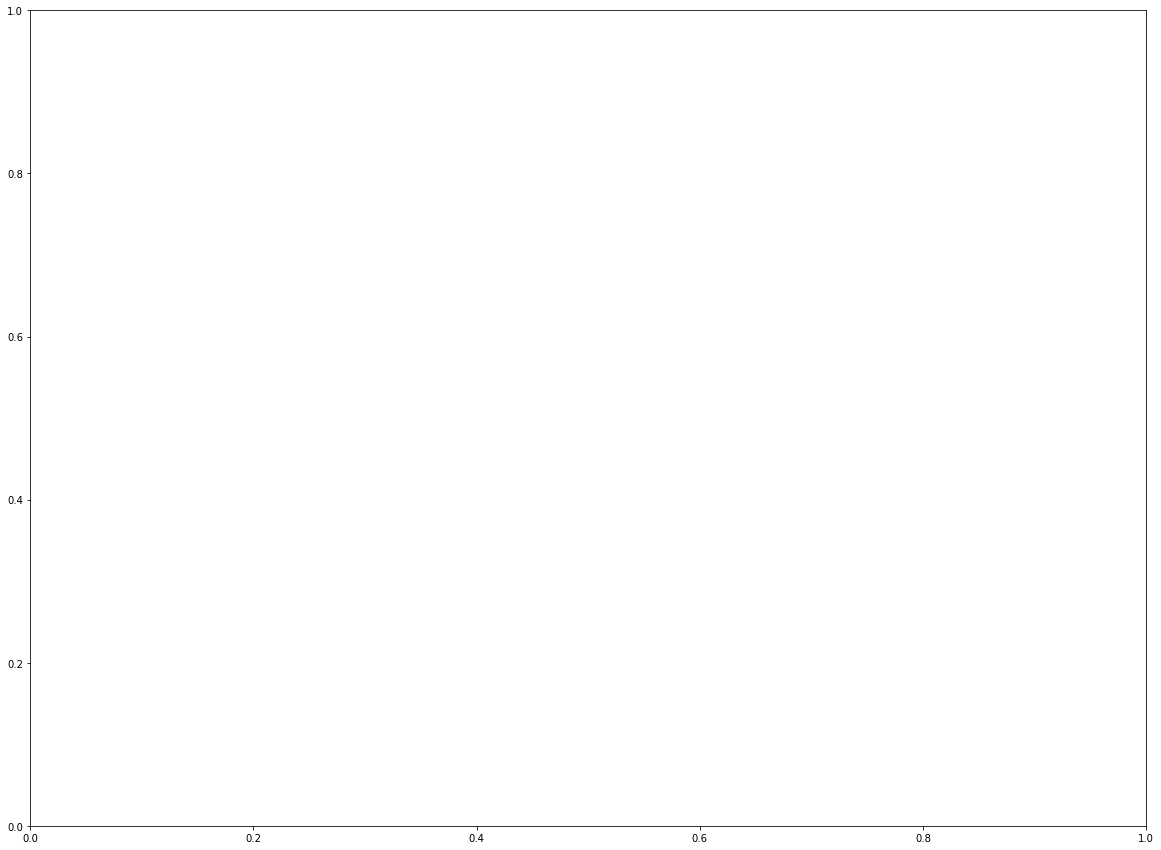

In [589]:
fig, ax = plt.subplots(figsize=(20,15))
for state_df in state_dfs:
    px.line(state_df['2008':'2018'].sharpe_ratio_annual)
fig.show()

In [92]:
test = df.groupby('State').agg(['mean','std']).drop(columns=['RegionID','RegionName','SizeRank'],axis=1)

MultiIndex([('1996-04', 'mean'),
            ('1996-04',  'std'),
            ('1996-05', 'mean'),
            ('1996-05',  'std'),
            ('1996-06', 'mean'),
            ('1996-06',  'std'),
            ('1996-07', 'mean'),
            ('1996-07',  'std'),
            ('1996-08', 'mean'),
            ('1996-08',  'std'),
            ...
            ('2017-12', 'mean'),
            ('2017-12',  'std'),
            ('2018-01', 'mean'),
            ('2018-01',  'std'),
            ('2018-02', 'mean'),
            ('2018-02',  'std'),
            ('2018-03', 'mean'),
            ('2018-03',  'std'),
            ('2018-04', 'mean'),
            ('2018-04',  'std')],
           length=530)

In [44]:
df.columns.values[7:] = get_datetimes(df)

In [73]:
x = get_datetimes(test)
AK = test[test.State == 'AK']

In [74]:
AK1 = melt_data_state(AK)

# Step 2: Data Preprocessing

# Step 3: EDA and Visualization

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

##

## Counties monthly EMA for 2,3 6 mos

# Step 4: Reshape from Wide to Long Format

# Step 5: ARIMA Modeling

# Step 6: Interpreting Results